In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [3]:
import pandas as pd

### Numerical Nash

In [4]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [5]:
columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

In [6]:
df = pd.read_csv("../reactive_equilibria.csv", index_col=0)

In [7]:
eq, noneq = seperate_equilibria_and_non(df)

### Results on Good Nash - Two bit reactive

In [19]:
custom_lines = [Line2D([0], [0], color='tab:green', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55),
                Line2D([0], [0], color='tab:orange', lw=4, alpha=.75)]

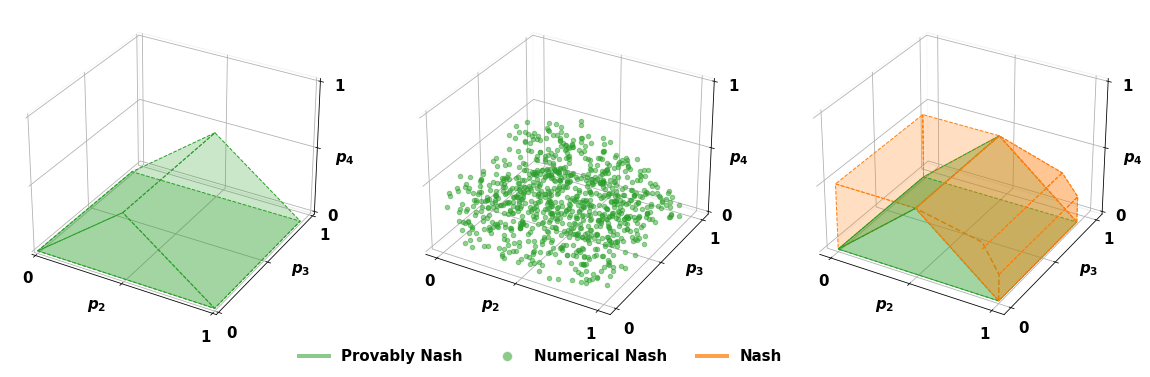

In [35]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:

#     ax.view_init(10, -70)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    
v = np.array([[0, 0, 0], [0, .9, 0], [1, 0, 0],  [1, .9, 0], [.5, 0, .5], [.5, .9, .5]])

verts = [[v[0], v[1], v[3], v[2]],
         [v[4], v[5], v[3], v[2]],
         [v[4], v[5], v[1], v[0]],
         [v[0], v[2], v[4], v[0]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:green',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:green', alpha=.25))

v = np.array([[0, 0, 0], [0, .9, 0], [1, 0, 0],  [1, .9, 0], [.5, 0, .5], [.5, .9, .5]])

verts = [[v[0], v[1], v[3], v[2]],
         [v[4], v[5], v[3], v[2]],
         [v[4], v[5], v[1], v[0]],
         [v[0], v[2], v[4], v[0]]]
            
ax3.add_collection3d(Poly3DCollection(verts, facecolors='tab:green',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:green', alpha=.25))

v2 = np.array([[0, 0, 0], [0, .9, 0], [.5, 0, .5], [.5, .9, .5], [0, 0, .5],  [0, .9, .5], ])

verts2 = [[v2[0], v2[1], v2[3], v2[2], v2[0], v2[4], v2[2]],
          [v2[2], v2[3], v2[5], v2[4]],
          [v2[5], v2[1]]]

ax3.add_collection3d(Poly3DCollection(verts2, facecolors='tab:orange',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:orange', alpha=.25))

v3 = np.array([[0, 0, .5], [0, .9, .5], [1, 0, .5], [1, .9, .5],
               [0, 0, 1], [0, .9, 1], [1, 0, 1], [1, .9, 1]])

verts3 = [[v3[0], v3[1], v3[3], v3[2], v3[0], v3[4], v3[5], v3[7], v3[6], v3[4]],
          [v3[1], v3[5], v3[4], v3[0], v3[1]],
          [v3[3], v3[7], v3[6], v3[2], v3[3]],
          [v3[0], v3[4], v3[6], v3[2]]]


v4 = np.array([[.5, 0, .5], [.5, .9, .5],
               [1, 0, 0], [1, .9, 0],
               [1, 0, .2], [1, .9, .2],
               [.9, 0, .35], [.9, .9, .35]])

verts4 = [[v4[0], v4[1], v4[3], v4[2]],
          [v4[3], v4[5], v4[7], v4[1]],
          [v4[0], v4[1], v4[3], v4[1], v4[7], v4[5], v4[3], v4[2]],
          [v4[4], v4[5]],
          [v4[6], v4[7]]]

ax3.add_collection3d(Poly3DCollection(verts4, facecolors='tab:orange',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:orange', alpha=.25))
ax3.plot([1, 1, 0.9, 0.5],
        [0, 0, 0, 0],
        [0, .2, .4, 0.5],
        '--', color="tab:orange");

ax3.legend(custom_lines, ['Provably Nash', 'Numerical Nash', 'Nash'], bbox_to_anchor=(0, 0), ncol=3, framealpha=0);


for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates()[:1000].iterrows():
    
    if row['p6'] < 0.5:

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:green', alpha=0.5)

ax2.set_zlim(0, 1);


plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/two_bit_reactive_nash_results.png", 
            transparent=True,  bbox_inches='tight')

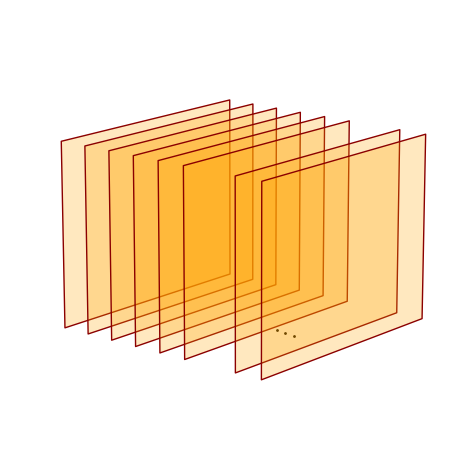

In [4]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.   , 0.125, 0.25 , 0.375  , 0.5, 0.625 , 0.875, 1.   ]:
    
    v = np.array([[x, 0, 0],
                  [x, 1, 0],
                  [x, 1, 1],
                  [x, 0, 1]])

    verts = [[v[0], v[1], v[2], v[3]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='orange',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='darkred', alpha=.25));
    
ax.scatter(0.71, 0.5, 0, color='black', s=1)
ax.scatter(0.66, 0.51, 0, color='black', s=1)
ax.scatter(0.76, 0.49, 0, color='black', s=1)
    
plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/ipd.png", 
            transparent=True,  bbox_inches='tight')

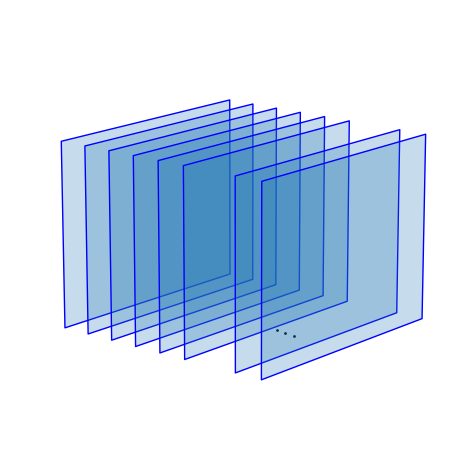

In [5]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.   , 0.125, 0.25 , 0.375  , 0.5, 0.625 , 0.875, 1.   ]:
    
    v = np.array([[x, 0, 0],
                  [x, 1, 0],
                  [x, 1, 1],
                  [x, 0, 1]])

    verts = [[v[0], v[1], v[2], v[3]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='tab:blue',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='blue', alpha=.25));
    
ax.scatter(0.71, 0.5, 0, color='black', s=1)
ax.scatter(0.66, 0.51, 0, color='black', s=1)
ax.scatter(0.76, 0.49, 0, color='black', s=1)
    
plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/memory_n.png", 
            transparent=True,  bbox_inches='tight')

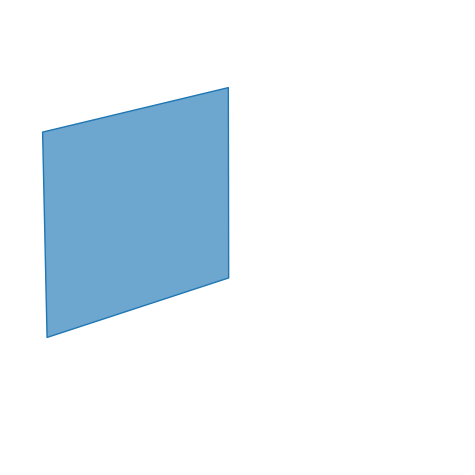

In [8]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.,]:
    
    v = np.array([[x, 0, 0],
                  [x, 1, 0],
                  [x, 1, 1],
                  [x, 0, 1]])

    verts = [[v[0], v[1], v[2], v[3]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='tab:blue',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='tab:blue', alpha=.65));
    
# ax.scatter(0.71, 0.5, 0, color='black', s=1)
# ax.scatter(0.66, 0.51, 0, color='black', s=1)
# ax.scatter(0.76, 0.49, 0, color='black', s=1)
    
plt.savefig("../figures/memory_one.png", 
            transparent=True,  bbox_inches='tight')

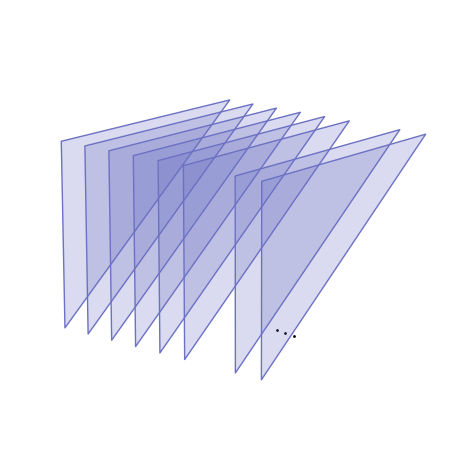

In [84]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.   , 0.125, 0.25 , 0.375  , 0.5, 0.625 , 0.875, 1.   ]:
    
    v = np.array([[x, 0, 0],
                  [x, 1, 0],
                  [x, 1, 1],
                  [x, 0, 1]])

    verts = [[v[0], v[3], v[2]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='#6C71C4',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='#6C71C4', alpha=.25));
    
ax.scatter(0.71, 0.5, 0, color='black', s=1)
ax.scatter(0.66, 0.51, 0, color='black', s=1)
ax.scatter(0.76, 0.49, 0, color='black', s=1)
    
    
plt.savefig("../figures/self_reactive_n.png", 
            transparent=True,  bbox_inches='tight')

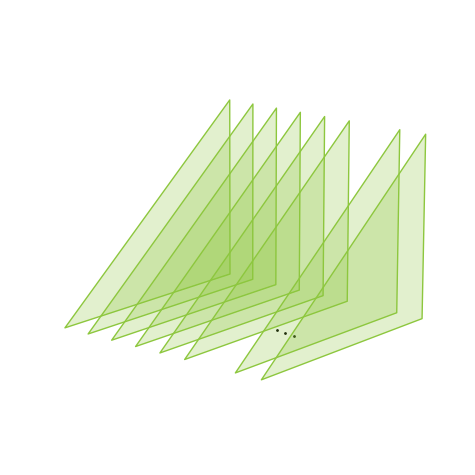

In [24]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.   , 0.125, 0.25 , 0.375  , 0.5, 0.625 , 0.875, 1.   ]:
    
    v = np.array([[x, 0, 0],
                  [x, 0, 1],
                  [x, 1, 1],
                  [x, 1, 0]])

    verts = [[v[0], v[3], v[2]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='#8DC73E',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='#8DC73E', alpha=.25));
    
ax.scatter(0.71, 0.5, 0, color='black', s=1)
ax.scatter(0.66, 0.51, 0, color='black', s=1)
ax.scatter(0.76, 0.49, 0, color='black', s=1)
    
    
plt.savefig("../figures/reactive_n.png", 
            transparent=True,  bbox_inches='tight')

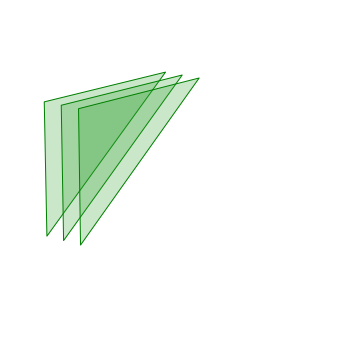

In [34]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d')


# ax.set_xticks([0, .5, 1])
# ax.set_yticks([0, .5, 1])
# ax.set_zticks([0, .5, 1])

# ax.set_xticklabels([0, "", 1])
# ax.set_yticklabels([0, "", 1])
# ax.set_zticklabels([0, "", 1])


# ax.annotate("$p_2$", (-0.03, -0.073), fontsize=15)
# ax.annotate("$p_3$", (.065, -0.055), fontsize=15)
# ax.annotate("$p_4$", (.08, 0.003), fontsize=15)

ax.axis('off')

ax.view_init(15, -50)
    
for x in [0.   , 0.125,  0.25]:
    
    v = np.array([[x, 0, 0],
                  [x, 1, 0],
                  [x, 1, 1],
                  [x, 0, 1]])

    verts = [[v[0], v[3], v[2]]]

    ax.add_collection3d(Poly3DCollection(verts, facecolor='tab:green',
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='green', alpha=.25));
    
ax.scatter(0.71, 0.5, 0, color='w', s=1)
ax.scatter(0.66, 0.51, 0, color='w', s=1)
ax.scatter(0.76, 0.49, 0, color='w', s=1)
    
plt.savefig("/Users/glynatsi/src/talks/posters/2022-06-09-Aquavit/static/three_bit_ev.png", 
            transparent=True,  bbox_inches='tight')

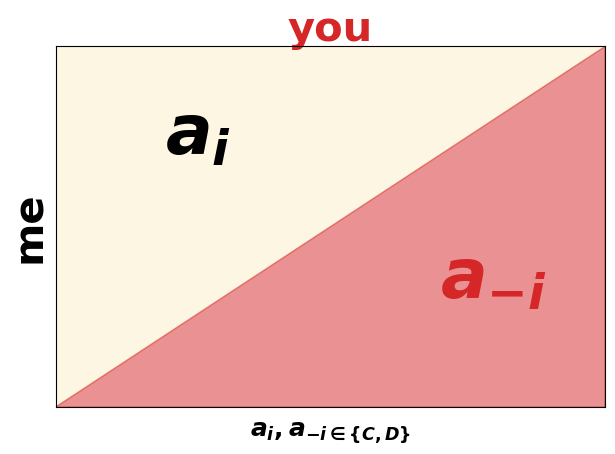

In [83]:
fig, ax = plt.subplots()

ax.set_ylim(0, .5);
ax.set_xlim(0, .5);

x = [0, 0, .5,]

y = [0, .5, .5,]

plt.fill(x, y, alpha=1, color='#FDF6E3')

x2 = [.5, .5, 0,]

y2 = [0, .5, 0,]

plt.fill(x2, y2, alpha=.5, color='tab:red')

ax.annotate('$a_i$', (.1, .35,), fontsize=50, color='black')

ax.annotate('$a_{-i}$', (.35, .15), fontsize=50, color='tab:red')

ax.set_yticks([]);

ax.set_xticks([]);

ax.set_ylabel("me", color='black', fontsize=30);

ax.xaxis.set_label_position('top') 

ax.set_xlabel("you", color='tab:red', fontsize=30);

ax.set_title("$a_i, a_{-i \in \{C, D\}}$", y=-0.1);

fig.tight_layout();

fig.savefig("../figures/action_matrix.pdf", 
            transparent=True,  bbox_inches='tight')